In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance

In [2]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


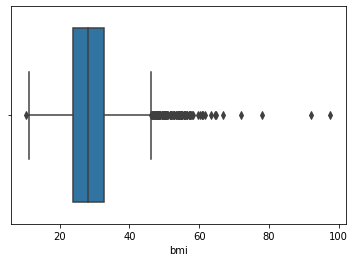

In [6]:
sns.boxplot(data['bmi'])

In [7]:
outliers = []
def detect_outliers(data):
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score) > thres:
      outliers.append(i)
  #q1 = np.percentile(data, 25)
  #q3 = np.percentile(data, 75)
  #IQR = q3 - q1
  #lwr_bound = q1 - (1.5 * IQR)
  #up_bound = q3 + (1.5 * IQR)
  #for i in data:
   # if (i < lwr_bound or i > up_bound):
    #  outliers.append(i)

  return outliers

In [8]:
outl = detect_outliers(data['bmi'])
print(outl)
print(len(outl))

[56.6, 54.6, 60.9, 54.7, 64.8, 54.7, 60.2, 71.9, 54.6, 55.7, 55.7, 57.5, 54.2, 52.3, 78.0, 53.4, 55.2, 55.0, 54.8, 52.8, 66.8, 55.1, 55.9, 57.3, 56.0, 57.7, 54.0, 56.1, 97.6, 53.9, 53.8, 52.7, 52.8, 55.7, 53.5, 63.3, 52.8, 61.2, 58.1, 52.7, 53.4, 59.7, 52.5, 52.9, 54.7, 61.6, 53.8, 54.3, 55.0, 57.2, 64.4, 92.0, 55.9, 57.9, 55.7, 57.2, 60.9, 54.1, 56.6]
59


In [9]:
print(data['bmi'].quantile(0.50)) 
print(data['bmi'].quantile(0.95)) 


28.1
42.65500000000002


In [10]:
data['bmi'] = np.where(data['bmi'] > 42.65, 28.1, data['bmi'])

In [11]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

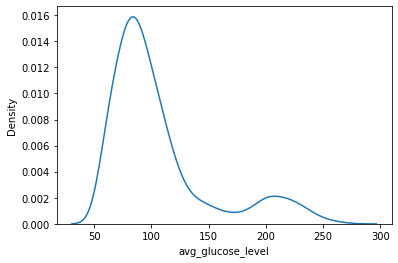

In [12]:
sns.kdeplot(data['avg_glucose_level'])

In [13]:
from scipy import stats
from pylab import *
import matplotlib.pyplot as plt
import pylab
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

In [14]:
data['work_type'] = data['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})
data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['Residence_type'] = data['Residence_type'].map({'Urban':0, 'Rural':1})
data['smoking_status'] = data['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
data['ever_married'] = data['ever_married'].map({'Yes':0, 'No':1})

In [15]:
data = data.drop(columns=['id'], axis = 1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,0,0,228.69,36.6,0,1
1,1.0,61.0,0,0,0,1,1,202.21,28.1,1,1
2,0.0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1.0,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1.0,79.0,1,0,0,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,80.0,1,0,0,0,0,83.75,28.1,1,0
5106,1.0,81.0,0,0,0,1,0,125.20,40.0,1,0
5107,1.0,35.0,0,0,0,1,1,82.99,30.6,1,0
5108,0.0,51.0,0,0,0,0,1,166.29,25.6,0,0


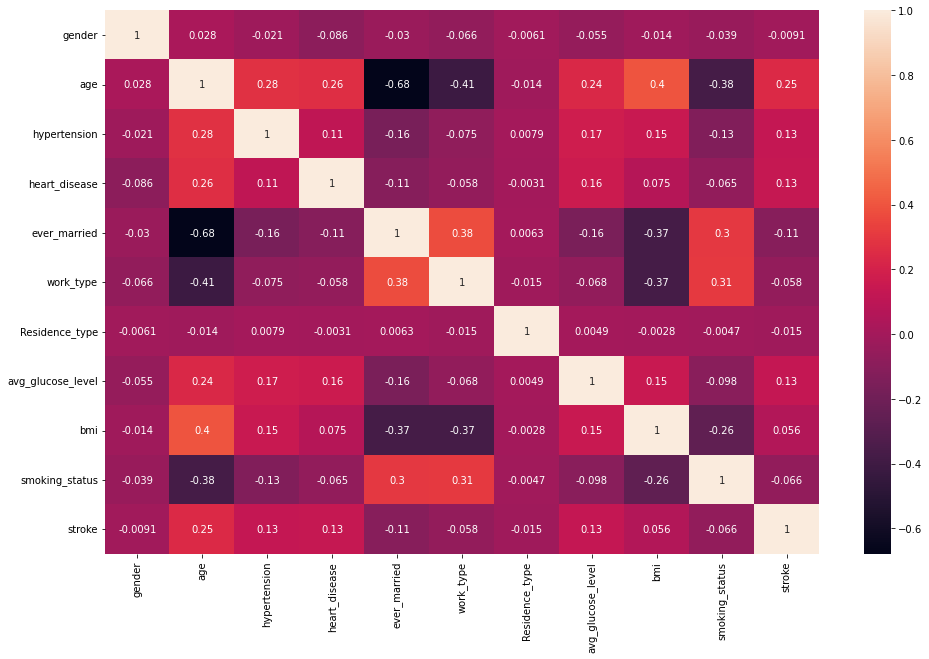

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)

In [17]:
data = data.drop(columns=['ever_married'], axis = 1)
data

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,0,228.69,36.6,0,1
1,1.0,61.0,0,0,1,1,202.21,28.1,1,1
2,0.0,80.0,0,1,0,1,105.92,32.5,1,1
3,1.0,49.0,0,0,0,0,171.23,34.4,2,1
4,1.0,79.0,1,0,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...
5105,1.0,80.0,1,0,0,0,83.75,28.1,1,0
5106,1.0,81.0,0,0,1,0,125.20,40.0,1,0
5107,1.0,35.0,0,0,1,1,82.99,30.6,1,0
5108,0.0,51.0,0,0,0,1,166.29,25.6,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


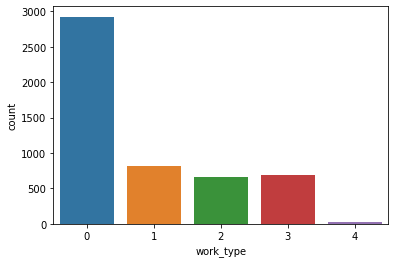

In [18]:
sns.countplot(data['work_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


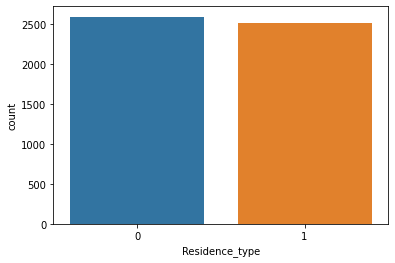

In [19]:
sns.countplot(data['Residence_type'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


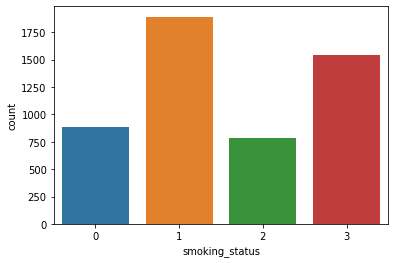

In [20]:
sns.countplot(data['smoking_status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


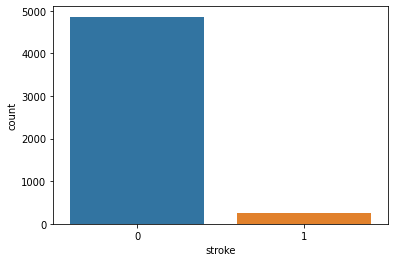

In [21]:
sns.countplot(data['stroke'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


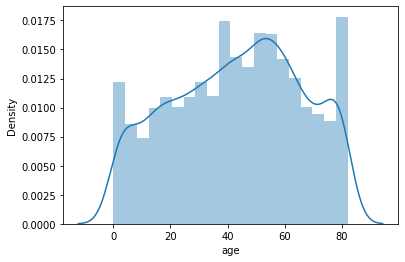

In [22]:
sns.distplot(data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


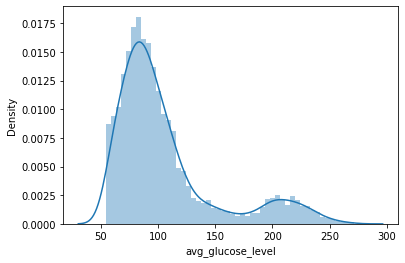

In [23]:
sns.distplot(data['avg_glucose_level'])

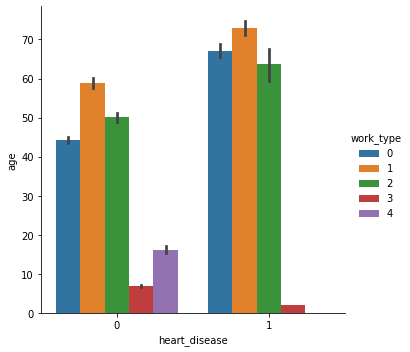

In [24]:
sns.catplot(x='heart_disease',y='age', hue="work_type", kind="bar", data=data)

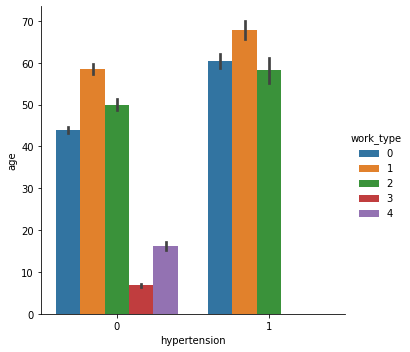

In [25]:
sns.catplot(x='hypertension',y='age', hue="work_type", kind="bar", data=data)

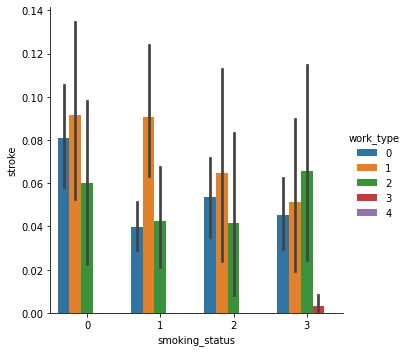

In [26]:
sns.catplot(x="smoking_status", y="stroke", hue="work_type", kind="bar", data=data)

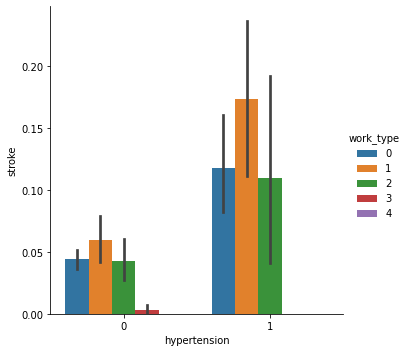

In [27]:
sns.catplot(x="hypertension", y="stroke", hue="work_type", kind="bar", data=data)

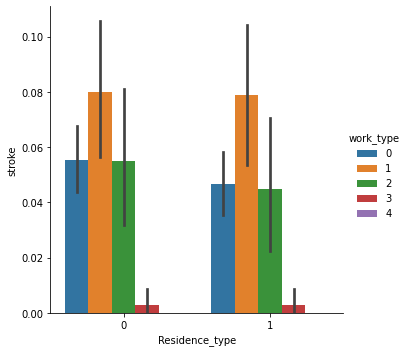

In [28]:
sns.catplot(x="Residence_type", y="stroke", hue="work_type", kind="bar", data=data)

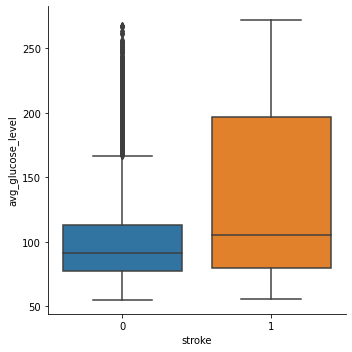

In [29]:
sns.catplot(x='stroke', y="avg_glucose_level", kind="box", data=data)

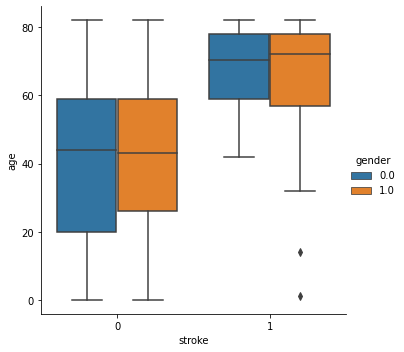

In [30]:
sns.catplot(x='stroke', y="age", hue = 'gender', kind="box", data=data)

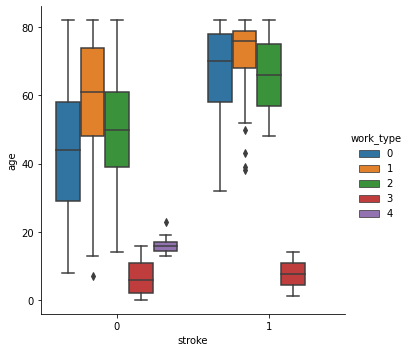

In [31]:
sns.catplot(x='stroke', y="age", hue = 'work_type', kind="box", data=data)

In [32]:
features = ['age',
 'hypertension',
 'heart_disease',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'gender',
 'work_type',
 'smoking_status']

label = ['stroke']

X = data[features]
y = data[label]

In [33]:
X['gender'] = X['gender'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [36]:
X_test.isnull().sum()

age                  0
hypertension         0
heart_disease        0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
work_type            0
smoking_status       0
dtype: int64

In [37]:
X_train

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status
5945,78.000000,0,0,1,78.492537,21.350114,0.592997,0,1
2268,6.000000,0,0,1,108.230000,18.600000,1.000000,3,3
445,13.000000,0,0,1,55.390000,23.200000,0.000000,3,3
5940,67.866228,0,0,1,206.015852,26.726754,1.000000,1,1
3118,31.000000,0,0,0,88.200000,22.700000,1.000000,2,1
...,...,...,...,...,...,...,...,...,...
5734,56.961246,0,0,0,71.205194,28.203875,0.000000,0,2
5191,57.000000,0,0,0,215.277588,30.160668,0.710575,0,2
5390,80.269259,0,0,1,86.851107,24.423111,1.000000,0,0
860,46.000000,0,0,1,100.150000,28.100000,1.000000,0,2


In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)

In [39]:
y_train.value_counts()

stroke
1         3650
0         3641
dtype: int64

In [40]:
X_test

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status
1145,7.000000,0,0,0,88.600000,17.400000,1.000000,3,3
8501,66.174832,0,0,0,76.578886,21.750722,0.000000,0,0
3903,66.000000,0,0,0,103.010000,33.100000,0.000000,0,1
1608,59.000000,0,0,0,93.580000,25.100000,0.000000,0,2
9139,41.824796,0,0,0,83.400072,25.452561,0.058401,0,2
...,...,...,...,...,...,...,...,...,...
5770,80.617767,0,0,0,96.153645,33.394214,0.382233,1,0
6816,67.455248,0,0,0,149.550495,27.849260,0.000000,0,0
8843,41.836128,0,0,0,95.850340,29.883613,1.000000,0,1
7654,52.434949,1,0,1,71.172906,31.204410,1.000000,0,0


In [41]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

In [42]:
X_test.isnull().sum()

age                  0
hypertension         0
heart_disease        0
Residence_type       0
avg_glucose_level    0
bmi                  0
gender               0
work_type            0
smoking_status       0
dtype: int64

In [43]:
X_test

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,gender,work_type,smoking_status
1145,7.000000,0,0,0,88.600000,17.400000,1.000000,3,3
8501,66.174832,0,0,0,76.578886,21.750722,0.000000,0,0
3903,66.000000,0,0,0,103.010000,33.100000,0.000000,0,1
1608,59.000000,0,0,0,93.580000,25.100000,0.000000,0,2
9139,41.824796,0,0,0,83.400072,25.452561,0.058401,0,2
...,...,...,...,...,...,...,...,...,...
5770,80.617767,0,0,0,96.153645,33.394214,0.382233,1,0
6816,67.455248,0,0,0,149.550495,27.849260,0.000000,0,0
8843,41.836128,0,0,0,95.850340,29.883613,1.000000,0,1
7654,52.434949,1,0,1,71.172906,31.204410,1.000000,0,0


In [44]:
X_test = sc.transform(X_test)

In [45]:
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train, y_train)
#end = timer.time()
#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_svm = svm_model.predict(X_test)
y_svm_prob = svm_model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
y_test.value_counts()

stroke
0         1220
1         1211
dtype: int64

Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1220
           1       0.85      0.90      0.87      1211

    accuracy                           0.87      2431
   macro avg       0.87      0.87      0.87      2431
weighted avg       0.87      0.87      0.87      2431

Confusion matrix for SVM: 
[[1027  193]
 [ 123 1088]]
Accuracy score for SVM: 0.87
Precision score for SVM: 0.85
Recall score for SVM: 0.90
F1 score for SVM: 0.87
Sensitivity score for SVM: 0.90
Specitivity score for SVM: 0.84
AUC score for SVM: 0.94


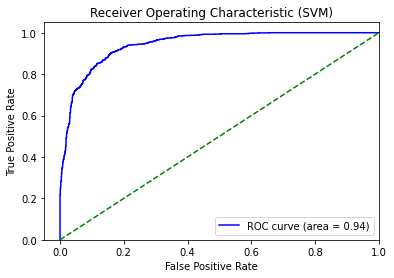

In [47]:
print("Classification report for SVM: \n{}".format(classification_report(y_test,y_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test,y_svm)))
# calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test,y_svm)
rec_svm = recall_score(y_test,y_svm)
f1_svm = f1_score(y_test,y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))
# calculate sensitivity, specificity, and auc
sens_svm,spec_svm = calc_sens_spec(y_test,y_svm)
fpr, tpr, _ = roc_curve(y_test,  y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test, y_svm_prob[:,1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specitivity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
plt.show()

In [48]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
end = timer.time()
#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gnb = gnb_model.predict(X_test)
y_gnb_prob = gnb_model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1220
           1       0.76      0.88      0.82      1211

    accuracy                           0.80      2431
   macro avg       0.81      0.80      0.80      2431
weighted avg       0.81      0.80      0.80      2431

Confusion matrix for GNB: 
[[ 889  331]
 [ 144 1067]]
Accuracy score for GNB: 0.80
Precision score for GNB: 0.76
Recall score for GNB: 0.88
F1 score for GNB: 0.82
Sensitivity score for GNB: 0.88
Specitivity score for GNB: 0.73
AUC score for GNB: 0.88


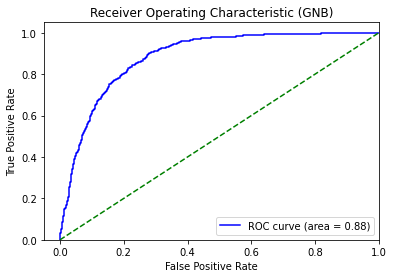

In [49]:
print("Classification report for GNB: \n{}".format(classification_report(y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(y_test,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(y_test,y_gnb)
rec_gnb = recall_score(y_test,y_gnb)
f1_gnb = f1_score(y_test,y_gnb)
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))
# calculate sensitivity, specificity, and auc
sens_gnb,spec_gnb = calc_sens_spec(y_test,y_gnb)
fpr, tpr, _ = roc_curve(y_test,  y_gnb_prob[:,1])
auc_gnb = roc_auc_score(y_test, y_gnb_prob[:,1])
print("Sensitivity score for GNB: {:.2f}".format(sens_gnb))
print("Specitivity score for GNB: {:.2f}".format(spec_gnb))
print("AUC score for GNB: {:.2f}".format(auc_gnb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GNB)')
ax.legend(loc="lower right")
plt.show()

In [50]:
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train, y_train)
#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_logit = logit_model.predict(X_test)
y_logit_prob = logit_model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1220
           1       0.79      0.83      0.81      1211

    accuracy                           0.81      2431
   macro avg       0.81      0.81      0.81      2431
weighted avg       0.81      0.81      0.81      2431

Confusion matrix for LR: 
[[ 955  265]
 [ 206 1005]]
Accuracy score for LR: 0.81
Precision score for LR: 0.79
Recall score for LR: 0.83
F1 score for LR: 0.81
Sensitivity score for LR: 0.83
Specitivity score for LR: 0.78
AUC score for LR: 0.89


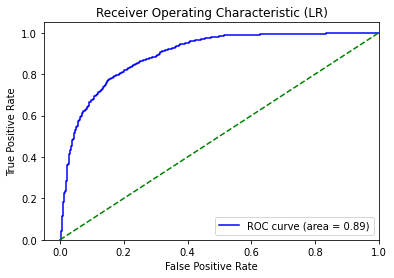

In [51]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))
# calculate sensitivity, specificity, and auc
sens_logit,spec_logit = calc_sens_spec(y_test,y_logit)
fpr, tpr, _ = roc_curve(y_test,  y_logit_prob[:,1])
auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])
print("Sensitivity score for LR: {:.2f}".format(sens_logit))
print("Specitivity score for LR: {:.2f}".format(spec_logit))
print("AUC score for LR: {:.2f}".format(auc_logit))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()

In [52]:
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train, y_train)

#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test)
y_dtree_prob = dtree_model.predict_proba(X_test)

Classification report for DT: 
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1220
           1       0.90      0.93      0.92      1211

    accuracy                           0.91      2431
   macro avg       0.92      0.91      0.91      2431
weighted avg       0.92      0.91      0.91      2431

Confusion matrix for DT: 
[[1100  120]
 [  87 1124]]
Accuracy score for DT: 0.91
Precision score for DT: 0.90
Recall score for DT: 0.93
F1 score for DT: 0.92
Sensitivity score for DT: 0.93
Specitivity score for DT: 0.90
AUC score for DT: 0.91


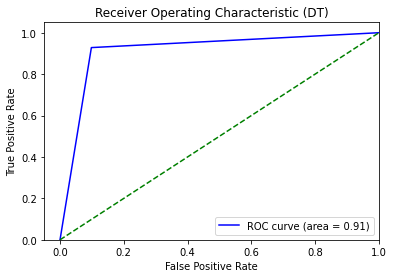

In [53]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_dtree)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(y_test,y_dtree)))
# calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test,y_dtree)
rec_dtree = recall_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))
# calculate sensitivity, specificity, and auc
sens_dtree,spec_dtree = calc_sens_spec(y_test,y_dtree)
fpr, tpr, _ = roc_curve(y_test,  y_dtree_prob[:,1])
auc_dtree = roc_auc_score(y_test, y_dtree_prob[:,1])
print("Sensitivity score for DT: {:.2f}".format(sens_dtree))
print("Specitivity score for DT: {:.2f}".format(spec_dtree))
print("AUC score for DT: {:.2f}".format(auc_dtree))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
plt.show()

In [54]:
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train, y_train)

#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test)
y_ranfor_prob = ranfor_model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Classification report for RF: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1220
           1       0.96      0.96      0.96      1211

    accuracy                           0.96      2431
   macro avg       0.96      0.96      0.96      2431
weighted avg       0.96      0.96      0.96      2431

Confusion matrix for RF: 
[[1166   54]
 [  54 1157]]
Accuracy score for RF: 0.96
Precision score for RF: 0.96
Recall score for RF: 0.96
F1 score for RF: 0.96
Sensitivity score for RF: 0.96
Specitivity score for RF: 0.96
AUC score for RF: 0.99


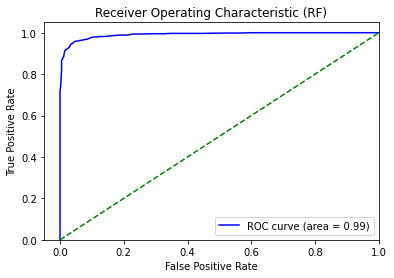

In [55]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))
# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))
# calculate sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)
fpr, tpr, _ = roc_curve(y_test,  y_ranfor_prob[:,1])
auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()

In [56]:
values = [[35, 0, 0, 0, 90, 21, 0, 0, 1]]
values = sc.transform(values)
predictions = ranfor_model.predict(values)
predictions

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])

In [57]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

#print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_xgb = xgb_model.predict(X_test)
y_xgb_prob = xgb_model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1220
           1       0.88      0.90      0.89      1211

    accuracy                           0.89      2431
   macro avg       0.89      0.89      0.89      2431
weighted avg       0.89      0.89      0.89      2431

Confusion matrix for XGB: 
[[1068  152]
 [ 126 1085]]
Accuracy score for XGB: 0.89
Precision score for XGB: 0.88
Recall score for XGB: 0.90
F1 score for XGB: 0.89
Sensitivity score for XGB: 0.90
Specitivity score for XGB: 0.88
AUC score for XGB: 0.96


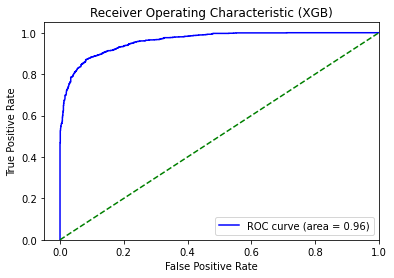

In [58]:
print("Classification report for XGB: \n{}".format(classification_report(y_test,y_xgb)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test,y_xgb)))
print("Accuracy score for XGB: {:.2f}".format(accuracy_score(y_test,y_xgb)))
# calculate precision, recall, and f1 scores
prec_xgb = precision_score(y_test,y_xgb)
rec_xgb = recall_score(y_test,y_xgb)
f1_xgb = f1_score(y_test,y_xgb)
print("Precision score for XGB: {:.2f}".format(prec_xgb))
print("Recall score for XGB: {:.2f}".format(rec_xgb))
print("F1 score for XGB: {:.2f}".format(f1_xgb))
# calculate sensitivity, specificity, and auc
sens_xgb,spec_xgb = calc_sens_spec(y_test,y_xgb)
fpr, tpr, _ = roc_curve(y_test,  y_xgb_prob[:,1])
auc_xgb = roc_auc_score(y_test, y_xgb_prob[:,1])
print("Sensitivity score for XGB: {:.2f}".format(sens_xgb))
print("Specitivity score for XGB: {:.2f}".format(spec_xgb))
print("AUC score for XGB: {:.2f}".format(auc_xgb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGB)')
ax.legend(loc="lower right")
plt.show()

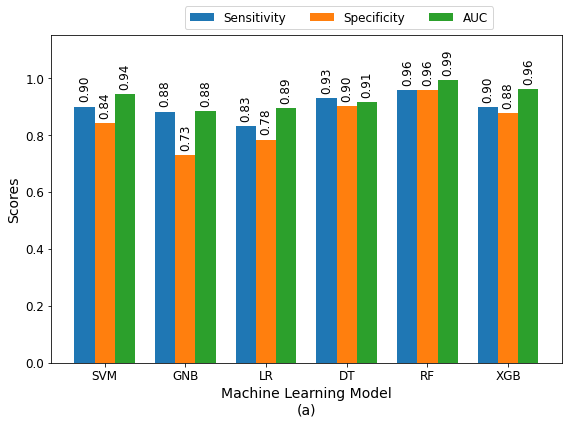

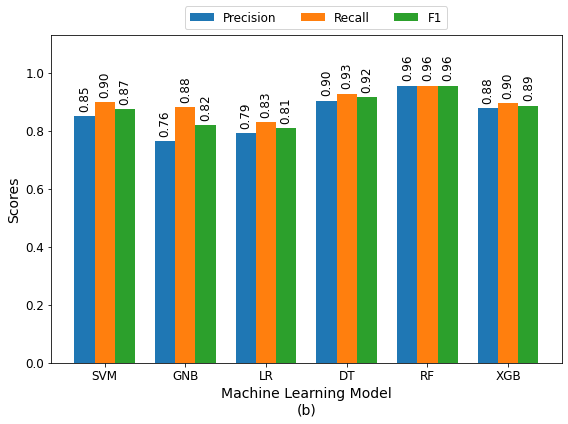

In [59]:
ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF', 'XGB']
sens_all = [sens_svm, sens_gnb, sens_logit, sens_dtree, sens_ranfor,  sens_xgb]
spec_all = [spec_svm, spec_gnb, spec_logit, spec_dtree, spec_ranfor,  spec_xgb]
auc_all = [auc_svm, auc_gnb, auc_logit, auc_dtree, auc_ranfor,  auc_xgb]

prec_all = [prec_svm, prec_gnb, prec_logit, prec_dtree, prec_ranfor,  prec_xgb]
rec_all = [rec_svm, rec_gnb, rec_logit, rec_dtree, rec_ranfor,  rec_xgb]
f1_all = [f1_svm, f1_gnb, f1_logit, f1_dtree, f1_ranfor,  f1_xgb]

def autolabel(bars):
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, auc_all, width, label='AUC')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.15])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(a)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_auc.pdf", bbox_inches='tight')
plt.show()

# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()

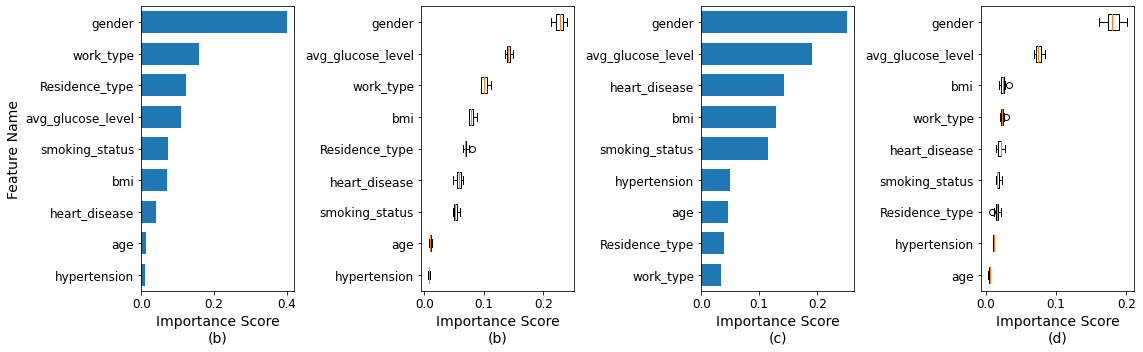

In [60]:
# feature importance from random forest
feature_names = data.columns[:-1].to_numpy()
ranfor_perm_imp = permutation_importance(ranfor_model, X_test, y_test, n_repeats=10, random_state=42)
ranfor_perm_sort_idx = ranfor_perm_imp.importances_mean.argsort()

ranfor_tree_sort_idx = np.argsort(ranfor_model.feature_importances_)
ranfor_indices = np.arange(0, len(ranfor_model.feature_importances_)) + 0.5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))
ax1.barh(ranfor_indices,ranfor_model.feature_importances_[ranfor_tree_sort_idx], height=0.7)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Importance Score\n(b)",fontsize=14)
ax1.set_ylabel("Feature Name",fontsize=14)
ax1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
ax1.set_yticks(ranfor_indices)
ax1.set_ylim((0, len(ranfor_model.feature_importances_)))
ax2.boxplot(ranfor_perm_imp.importances[ranfor_perm_sort_idx].T,vert=False,labels=feature_names[ranfor_perm_sort_idx])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel("Importance Score\n(b)",fontsize=14)

# feature importance from XGBoost
xgb_perm_imp = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)
xgb_perm_sort_idx = xgb_perm_imp.importances_mean.argsort()

xgb_tree_sort_idx = np.argsort(xgb_model.feature_importances_)
xgb_indices = np.arange(0, len(xgb_model.feature_importances_)) + 0.5

ax3.barh(xgb_indices,xgb_model.feature_importances_[xgb_tree_sort_idx], height=0.7)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_xlabel("Importance Score\n(c)",fontsize=14)
ax3.set_yticklabels(feature_names[xgb_tree_sort_idx])
ax3.set_yticks(xgb_indices)
ax3.set_ylim((0, len(xgb_model.feature_importances_)))
ax4.boxplot(xgb_perm_imp.importances[xgb_perm_sort_idx].T,vert=False,labels=feature_names[xgb_perm_sort_idx])
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.set_xlabel("Importance Score\n(d)",fontsize=14)
fig.tight_layout()
fig.savefig("feature_importance.pdf", bbox_inches='tight')
plt.show()

In [61]:
import pickle
file = open('ranfor_model.pkl','wb')
pickle.dump(ranfor_model, file)

In [66]:
from joblib import dump, load
dump(ranfor_model, 'savedModel.joblib') 
dump(sc, 'savedColumnTransformer.joblib')

['savedColumnTransformer.joblib']

In [64]:
file1 = open('sc.pkl', 'wb')
pickle.dump(sc, file1)